In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

In [20]:
filepath = "data/subj-101.csv"
data = pd.read_csv(filepath)

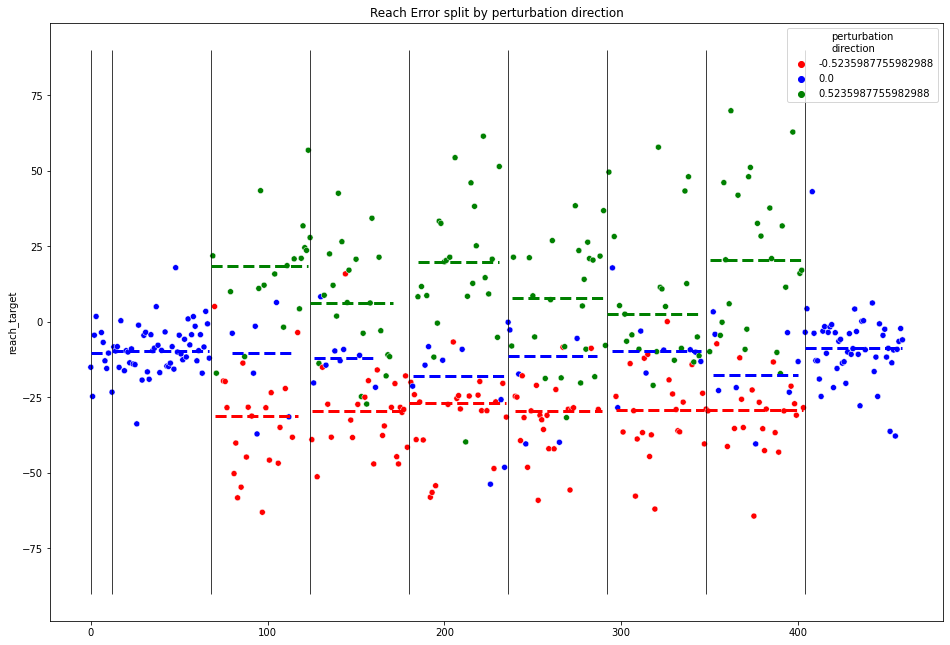

In [54]:
col_pal = ["red", "blue", "green"]
cond = data.trial_perturb.unique()
cond.sort()
cond_pal = {i[0]: i[1] for i in list(zip(cond, col_pal))}

f, ax = plt.subplots(figsize=(16, 11))
f.patch.set_facecolor("white")
sns.color_palette("Paired")
g = sns.scatterplot(
    x=data.index.to_numpy(), 
    y="reach_target", 
    hue="trial_perturb", 
    data=data, 
    ax=ax,
    palette=col_pal,
)

for block in data.block.unique():
    bl_data = data.loc[data.block == block]
    for i in bl_data.trial_perturb.unique():
        sub_bl = bl_data.loc[bl_data.trial_perturb == i]
        sub_col = cond_pal[i]
        mean = sub_bl.reach_target.median()
        min_ix = sub_bl.index.min()
        max_ix = sub_bl.index.max()
        ax.plot([min_ix, max_ix], [mean, mean], color=sub_col, lw=3, ls="--")
# cond = data.trial_perturb.unique()
# cond.sort()
# for ix, i in enumerate(cond):
#     y = data[data.trial_perturb == i]
    
ax.legend(title="perturbation\ndirection")
ax.vlines(np.where(data.trial_in_block == 0)[0], ymin=-90, ymax=90, color="black", lw=0.75)
plt.title("Reach Error split by perturbation direction");

In [49]:
data.index.max()

459